# Chicago Crime Analysis
We mainly focus on 2020.csv data set to analyze crimes in Chicago.

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

# Pre-processing Data

## Overview

In [2]:
DATA_DIR = './DATA/'

In [3]:
df20 = pd.read_csv('{}2020.csv'.format(DATA_DIR))
df20.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12016034,JD193556,01/01/2020 12:00:00 AM,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,32.0,22.0,11,1160263.0,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)"
1,12220321,JD430436,01/01/2020 12:00:00 AM,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2,12013828,JD191019,01/01/2020 12:00:00 AM,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,22.0,56.0,02,1143770.0,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)"
3,12019692,JD197444,01/01/2020 12:00:00 AM,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,47.0,6.0,11,1164983.0,1921507.0,2020,04/01/2020 03:50:17 PM,41.940222,-87.669039,"(41.940221932, -87.669039008)"
4,12843813,JF415893,01/01/2020 12:00:00 AM,022XX E 70TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,5.0,43.0,11,NaN,NaN,2020,09/30/2022 04:48:19 PM,NaN,NaN,NaN


(211426, 22)


<AxesSubplot: >

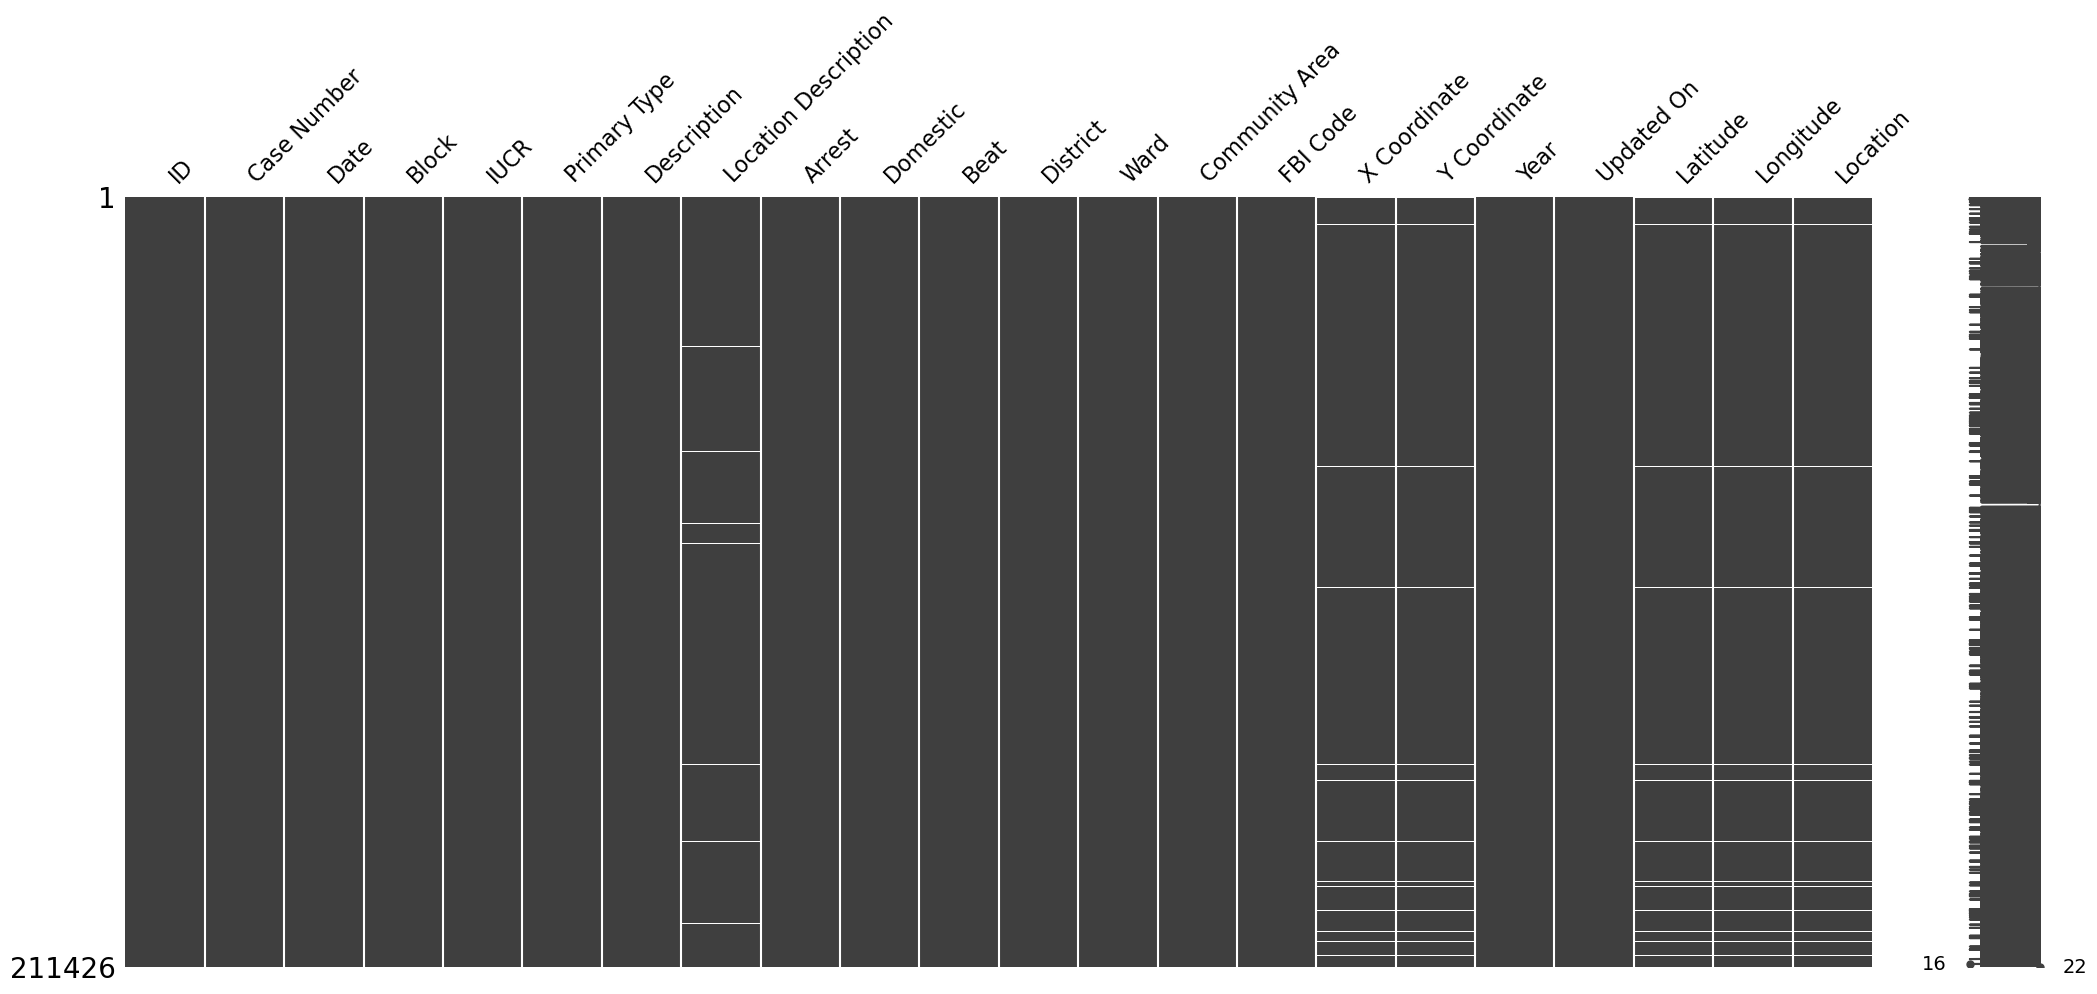

In [4]:
print(df20.shape)
msno.matrix(df20)

How many records having missing entry in total?

In [5]:
rows_having_missing = df20.isna().any(axis=1).sum()
print('incomplete records: {}'.format(rows_having_missing))
print('{:.2}% in total'.format(100 * rows_having_missing/df20.shape[0]))

incomplete records: 4503
2.1% in total


Therefore, we can simply discard all incomplete records.

In [6]:
df20 = df20.dropna()
print(df20.shape)

(206923, 22)


# Feature Study

show what features we've got

In [7]:
df20.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

We can split these features into 3 categories:
1. **crime related**: ID, Case Number, IUCR, Primary Type, Description, Arrest, Domestic, Beat, FBI Code
2. **location related**: Block, Location Description, District, Ward, Community Area, X Coordinate, Y Coordinate, Latitude, Longitude, Location
3. **time related**: Date, Year, Updated On

# Case Study

# Location Study

There are location related features: Block, Location Description, District, Ward, Community Area, X Coordinate, Y Coordinate, Latitude, Longitude, Location.

These features can also be divided into area features, such as Community Area, and spot features, such as X & Y Coordinate.

Let's go Community Area first.

In [8]:
df20['Community Area'].head()

0    22.0
1    47.0
2    56.0
3     6.0
5    66.0
Name: Community Area, dtype: float64

According to the [wikipedia](https://en.wikipedia.org/wiki/Community_areas_in_Chicago), we can know that there are 77 areas in total from 1 to 77.
However, the data type is float in the dataset. Therefore, we need to change the data type.

In [9]:
df20['Community Area'] = df20['Community Area'].astype('int')
df20['Community Area'].head()

0    22
1    47
2    56
3     6
5    66
Name: Community Area, dtype: int64

In [10]:
df20['Community Area'].describe()

count    206923.000000
mean         37.552505
std          21.501864
min           1.000000
25%          23.000000
50%          32.000000
75%          56.000000
max          77.000000
Name: Community Area, dtype: float64

<AxesSubplot: >

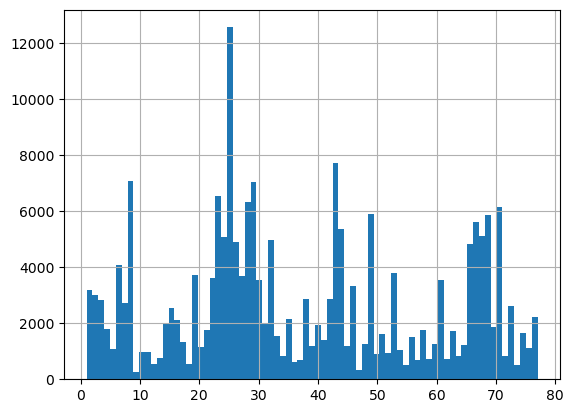

In [11]:
df20['Community Area'].hist(bins=77)

And then, we check its frequency of crimes per community area. It's worth to notice that there is a community area having the number of crimes far beyond others, which is more than 12,000.

<AxesSubplot: >

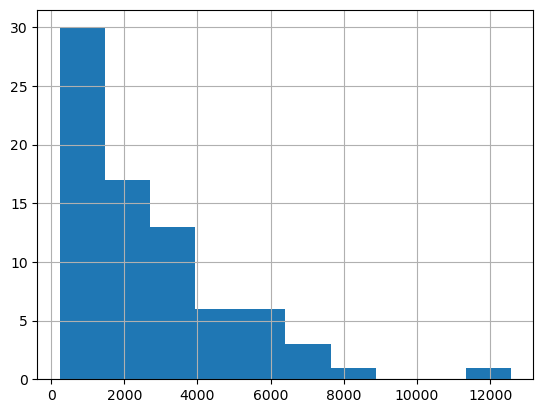

In [12]:
crimes_by_area = df20['Community Area'].value_counts()
crimes_by_area.hist()

In [13]:
crimes_by_area.describe()

count       77.000000
mean      2687.311688
std       2247.614755
min        243.000000
25%       1057.000000
50%       1854.000000
75%       3690.000000
max      12568.000000
Name: Community Area, dtype: float64

<AxesSubplot: >

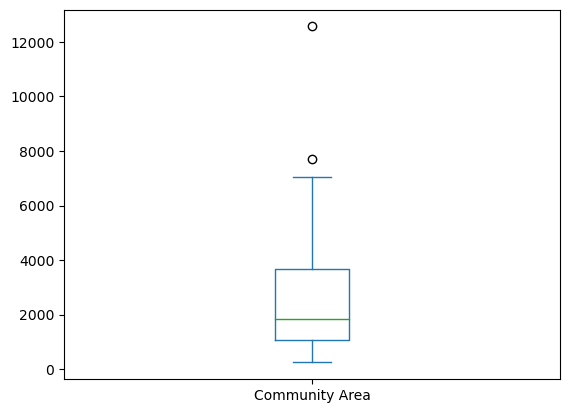

In [14]:
crimes_by_area.plot.box()

In [15]:
crimes_by_area.median()

1854.0

In [16]:
crimes_by_area.sort_values(ascending=False)

25    12568
43     7708
8      7064
29     7029
23     6539
      ...  
12      533
74      500
55      496
47      337
9       243
Name: Community Area, Length: 77, dtype: int64

The average number of crimes among area is 2687.311688, and the median is 1854.0. From the boxplot, we can see that there are two outliers, which means these two areas are extremely affected by criminal activities. The most sinful community area is 25, and the second one is 43.

In [17]:
frame = gpd.read_file("{}Chicago_Areas.geojson".format(DATA_DIR))

In [18]:
frame['crime count by area'] = frame.area_numbe.map(lambda x: crimes_by_area[int(x)] if int(x) in crimes_by_area else 0)

<Figure size 1000x1400 with 0 Axes>

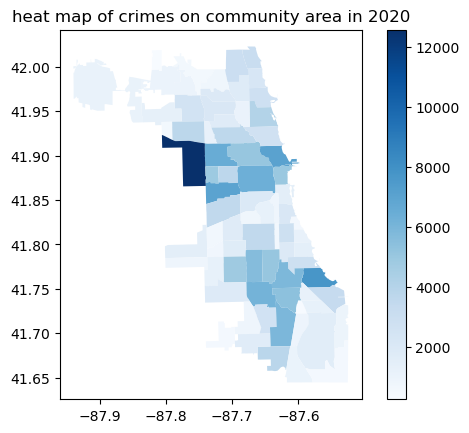

In [19]:
fig = plt.figure(figsize=(10, 14))
ax = frame.plot(column="crime count by area", legend=True, cmap='Blues')
plt.title('heat map of crimes on community area in 2020')
plt.show()

In [20]:
frame[['area_numbe', 'crime count by area', 'community']].sort_values(by='crime count by area', ascending=False)

,area_numbe,crime count by area,community
25,25,12568,AUSTIN
38,43,7708,SOUTH SHORE
36,8,7064,NEAR NORTH SIDE
29,29,7029,NORTH LAWNDALE
23,23,6539,HUMBOLDT PARK
...,...,...,...
11,12,533,FOREST GLEN
72,74,500,MOUNT GREENWOOD
53,55,496,HEGEWISCH
42,47,337,BURNSIDE


Here we found that the most sinful community areas 25 and 43 are actually the Austin and South Shore.

<Figure size 1000x1400 with 0 Axes>

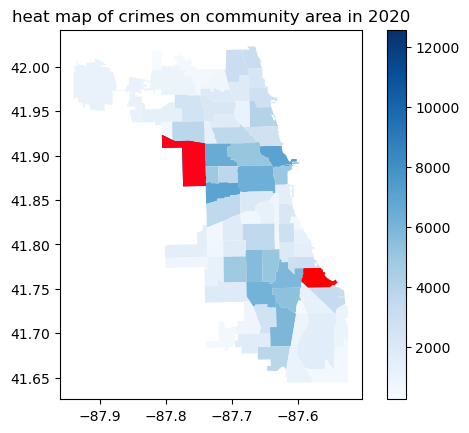

In [21]:
fig = plt.figure(figsize=(10, 14))
ax = frame.plot(column="crime count by area", legend=True, cmap='Blues')
frame.sort_values(by='crime count by area', ascending=False)[:2].plot(column='crime count by area', cmap='hsv', ax=ax)
plt.title('heat map of crimes on community area in 2020')
plt.show()

# Time Study

# Further Investigation